In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the customer tip dataset and print the first five observations

In [3]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/TAKE_HOME/DAY 1/customer_tip.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Make a list of categorical and numerical variables in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df_cat=df.select_dtypes(include="object")
df_num=df.select_dtypes(exclude="object")
print(f"The Categorical and numerical variables are respectively\n\nCategorical Variables\n\n{df_cat}\n\nNumerical Variables\n\n{df_num}")

The Categorical and numerical variables are respectively

Categorical Variables

        sex smoker   day    time
0    Female     No   Sun  Dinner
1      Male     No   Sun  Dinner
2      Male     No   Sun  Dinner
3      Male     No   Sun  Dinner
4    Female     No   Sun  Dinner
..      ...    ...   ...     ...
239    Male     No   Sat  Dinner
240  Female    Yes   Sat  Dinner
241    Male    Yes   Sat  Dinner
242    Male     No   Sat  Dinner
243  Female     No  Thur  Dinner

[244 rows x 4 columns]

Numerical Variables

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Compute the average bill amount for each day
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

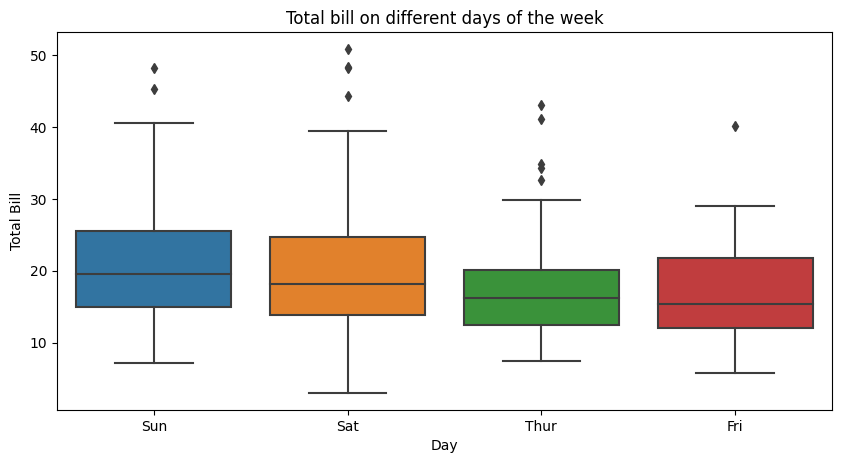

In [5]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(data=df,x='day',y='total_bill')
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total bill on different days of the week")
plt.show()

In [6]:
pd.pivot_table(data=df,values='total_bill',index='day')

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Which gender is more generous in giving the tip?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
pd.pivot_table(data=df,values='tip',index='sex')

,tip
sex,
Female,2.833448
Male,3.089618


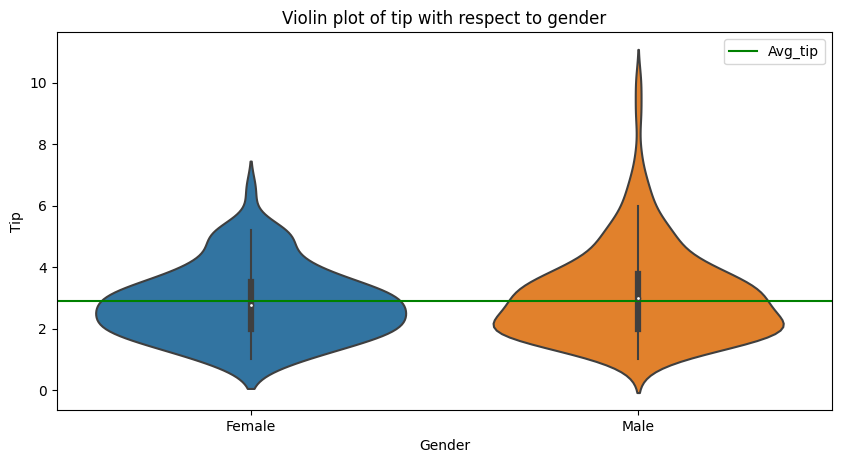

In [8]:
plt.figure(figsize=(10,5),dpi=100)
sns.violinplot(data=df,y='tip',x='sex',split=True,orient="v")
plt.axhline(df['tip'].median(),color='green',label="Avg_tip")
plt.title("Violin plot of tip with respect to gender")
plt.legend()
plt.xlabel("Gender")
plt.ylabel("Tip")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. According to the data, were there more customers for dinner or lunch? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

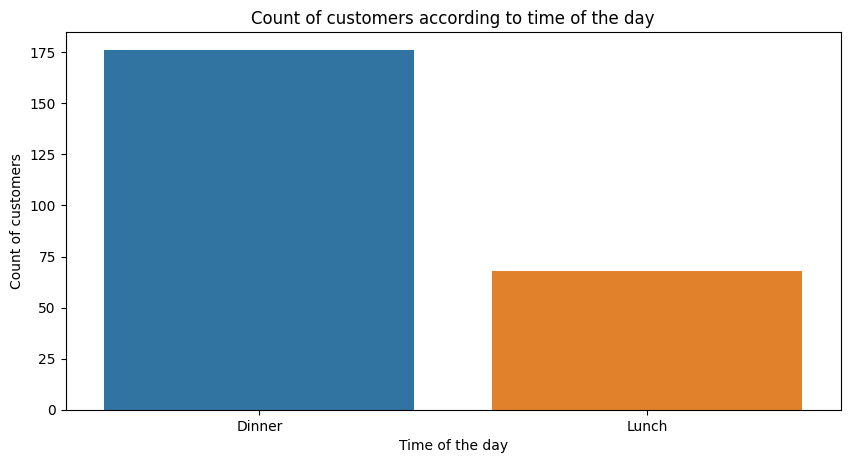

In [9]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df,x=df['time'])
plt.ylabel("Count of customers")
plt.xlabel("Time of the day")
plt.title("Count of customers according to time of the day")
plt.show()

In [10]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Based on the statistical summary, comment on the variable 'tip'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

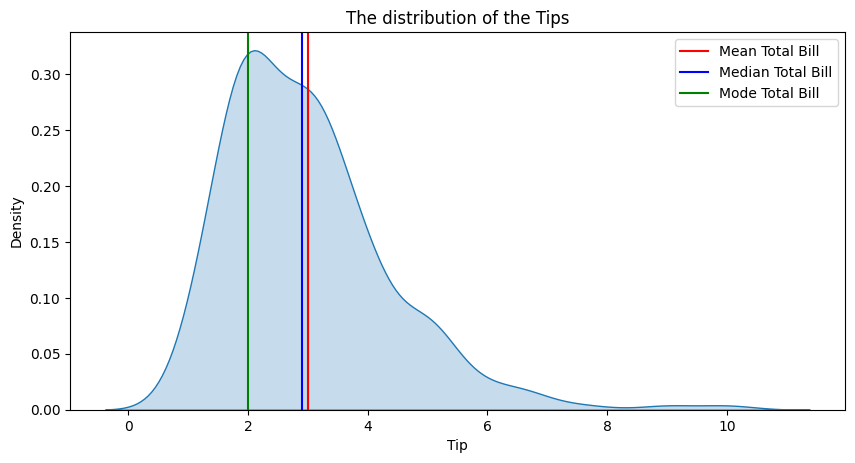

In [12]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['tip'],shade=True)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.axvline(df['tip'].mean(),label='Mean Total Bill',color='red')
plt.axvline(df['tip'].median(),label='Median Total Bill',color='blue')
plt.axvline(df['tip'].value_counts().index[0],label='Mode Total Bill',color='green')
plt.legend()
plt.title("The distribution of the Tips")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the busiest day in terms of the orders
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

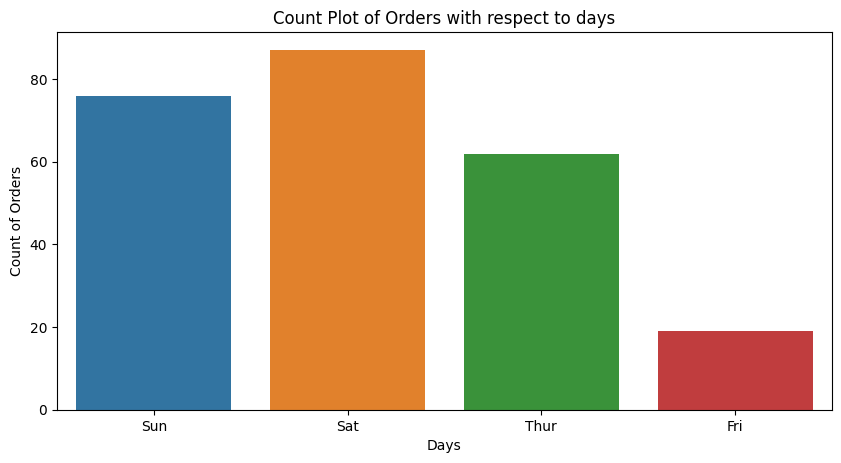

In [13]:
plt.figure(figsize = (10,5),dpi=100)
sns.countplot(data=df,x=df['day'])
plt.xlabel("Days")
plt.ylabel("Count of Orders")
plt.title("Count Plot of Orders with respect to days")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The skewness of the total bill is 1.13 which is way beyond he range and the total bill is right skewed


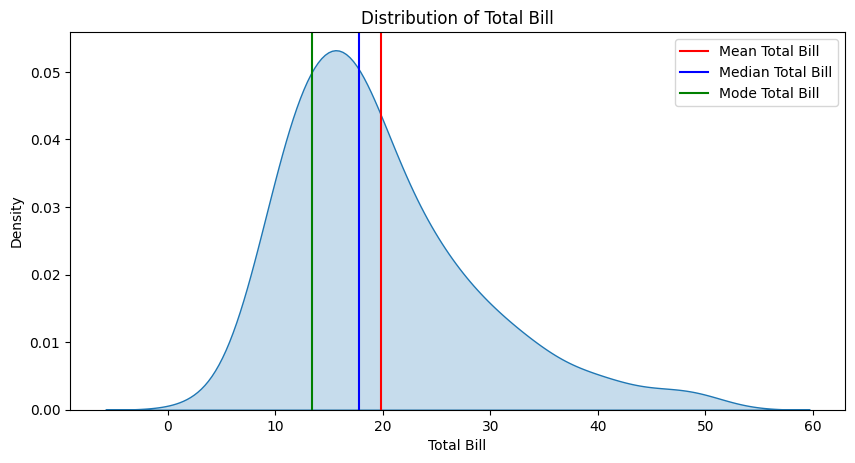

In [14]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['total_bill'],shade=True)
plt.axvline(df['total_bill'].mean(),label='Mean Total Bill',color='red')
plt.axvline(df['total_bill'].median(),label='Median Total Bill',color='blue')
plt.axvline(df['total_bill'].value_counts().index[0],label='Mode Total Bill',color='green')
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Distribution of Total Bill")
print(f"The skewness of the total bill is {df['total_bill'].skew():0.2f} which is way beyond he range and the total bill is right skewed")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Is the tip amount dependent on the total bill?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
print(f"The tip amount and total bill {df[['tip','total_bill']].corr().iloc[0][1]*100:0.2f}%")

The tip amount and total bill 67.57%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  What is the value under which 20% of the total bill would lie?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The value below which 0.2 of total bill would lie is $ 12.64


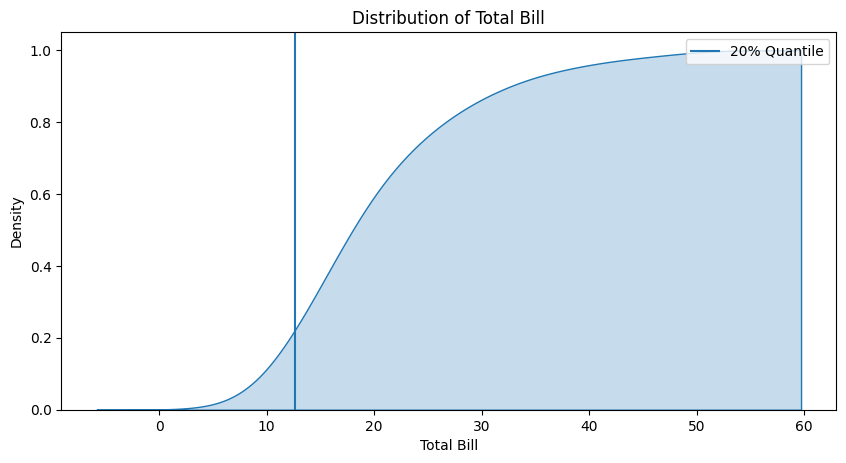

In [16]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['total_bill'],shade=True,cumulative=True)
plt.axvline(x=df['total_bill'].quantile(0.2),label='20% Quantile')
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Distribution of Total Bill")
print(f"The value below which {df[df['total_bill']<=df['total_bill'].quantile(0.2)].value_counts().sum()/len(df):0.1f} of total bill would lie is $ {df['total_bill'].quantile(0.2):0.2f}")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Retrieve the orders where the bill amount is more than 2 standard deviation away from the average bill </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df[(df['total_bill']>df['total_bill'].mean()+2*(df['total_bill'].std())) | (df['total_bill']<df['total_bill'].mean()+2*(df['total_bill'].std()))]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
